<a href="https://colab.research.google.com/github/secun/JupyterNotebooks/blob/main/EncuestaTiempoRealPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resultados en tiempo real
Hay multitud de ejemplos en los que puede ser interesante trabajar casi en tiempo real con los resultados del trabajo de los alumnos. La siguiente herramienta puede volverse muy util para **el trabajo en un laboratorio** ya que convierte en algo practicamente instantaneo el procesamiento estadistico de datos.

 Puede servir para involucrar a los alumnos diciendoles que compartan los resultados de una practica en los distintos apartados de un formulario de google y vean una comparativa con los de sus compañeros y un resultado global de la clase. Normalmente es importante repetir varias veces un experimento para obtener una buena estadistica y de este modo vamos a poder aglutinar toda la información de varios grupos realizando la misma practica simultaneamente.

 En este caso como base para nuestro analisis usaremos los resultados de un cuestionario sobre la motivación de los estudiantes para trabajar la asignatura:
[ https://forms.gle/YfLmS3tNtto7cq3h8](https://forms.gle/YfLmS3tNtto7cq3h8)

# Importar los resultados de un "google form"
En la configuración del formulario de google nos permite almacenar automaticamente los resultados en una hoja de calculo de google. Podemos manipular esta hoja de forma sencilla instalando "gspread" y proporcionando las credenciales con el codigo que obtenemos tras acceder link que aparece en la consola.

In [ ]:
!pip install --upgrade gspread
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())


  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


#Creación del DataFrame
Tomamos las filas y las almacenamos en un dataframe con pandas

In [ ]:
worksheet = gc.open('Motivación FyQ (respuestas)').sheet1

import pandas as pd
test=worksheet.get_all_records()
test_df=pd.DataFrame.from_records(test)
#test_df.head()

#Importamos el resto de librerias con las que vamos a trabajar

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Estadisticas basicas en un vistazo
Con el metodo ".describe" de los dataframe obtenemos media, desviación y cuartiles de todos los apartados-

In [ ]:
test_df.describe()

,2. Porque me resulta placentero aprender cosas nuevas.,9. Por el placer que experimento descubriendo cosas nuevas que no he visto antes.,16. Por lo placentero que me resulta ampliar mi conocimiento en temas atractivos para mi.,6. Por el placer que siento al superarme a mi mismo en mis estudios.,20. Por la satisfacción que siento en el proceso de superar actividades académicas complejas.,27. Porque me permite experimentar satisfacción personal la búsqueda por sobresalir en mis estudios.,4. Porque me gusta estar en clase de la asignatura,11. Para mi la clase de Física y Química es divertida,25. Por la buena sensación que experimento leyendo sobre las cosas interesantes de la asignatura.,3. Porque pienso que me preparará mejor para el futuro profesional que he elegido.,10. Para que llegado el momento pueda acceder al mercado laboral en el campo que me gusta.,17. Porque me ayudará a tomar mejores decisiones respecto a mi futuro profesional.,24. Porque esta formación mejorará mis competencias como trabajador,7. Para demostrarme a mis mismo que soy capaz de superar la asignatura.,14. Por el hecho de que me siento importante teniendo éxito en la asignatura.,21. Para demostrarme a mi mismo que soy una persona inteligente,28. Porque quiero demostrarme a mi mismo que puedo tener éxito en la asignatura.,1. Porque necesito estos conocimientos para tener un trabajo bien pagado en el futuro,8. Para tener un trabajo mas prestigioso en el futuro.,"15. Porque quiero tener ""una buena vida"" en el futuro.",22. Para tener un buen salario u otros beneficios en el futuro,"5. Honestamente , no lo sé; realmente siento que estoy perdiendo el tiempo en esta asignatura.","12. En principio tenia buenos motivos para elegir esta asignatura, ahora me pregunto si debería seguir.","19. Francamente no entiendo que hago en esta asignatura, no me podría importar menos."
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000
mean,3.555556,3.777778,3.777778,3.222222,3.777778,3.333333,3.0,3.333333,3.666667,4.111111,3.777778,3.444444,3.777778,4.222222,3.777778,3.222222,3.444444,3.888889,3.888889,4.666667,4.333333,4.555556,4.00000,3.888889
std,2.403701,2.333333,2.108185,2.488864,2.438123,2.236068,2.0,2.549510,2.598076,2.315407,2.488864,1.666667,1.855921,2.333333,2.386304,1.855921,2.185813,2.204793,2.147350,1.802776,2.179449,2.068279,2.12132,2.368778
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.00000,1.000000
25%,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.0,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.00000,2.000000
50%,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.0,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,5.000000,4.000000,5.000000,4.00000,5.000000
75%,6.000000,6.000000,5.000000,5.000000,6.000000,4.000000,4.0,6.000000,6.000000,6.000000,6.000000,4.000000,5.000000,7.000000,6.000000,4.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.00000,6.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000


No todas las respuestas han sido tomadas como numéricas

In [ ]:
#test_df.shape
test_df.info()
#test_df.nunique()
#test_df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 31 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Marca temporal                                                                                                    9 non-null      object
 1   Dirección de correo electrónico                                                                                   9 non-null      object
 2   Código del Alumno                                                                                                 9 non-null      object
 3   2. Porque me resulta placentero aprender cosas nuevas.                                                            9 non-null      int64 
 4   9. Por el placer que experimento descubrie

In [ ]:
for i in range(3, len(test_df.columns)):
    test_df.iloc[:,i] = pd.to_numeric(test_df.iloc[:,i], errors='ignore', downcast='float')
    test_df.iloc[:,i] = test_df.iloc[:,i].astype(float)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 31 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   Marca temporal                                                                                                    9 non-null      object 
 1   Dirección de correo electrónico                                                                                   9 non-null      object 
 2   Código del Alumno                                                                                                 9 non-null      object 
 3   2. Porque me resulta placentero aprender cosas nuevas.                                                            9 non-null      float64
 4   9. Por el placer que experimento des

#Filtrado de Variables
Se podria dar el caso de que no todas nuestras variables fuesen numericas y necesitasemos filtrarlas

In [ ]:
df_num = test_df.select_dtypes(include = ['float','integer'])
#df_categorical = test_df.select_dtypes(include = ['O'])
#df_num


#Histogramas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe277206ef0>,
      dtype=object)

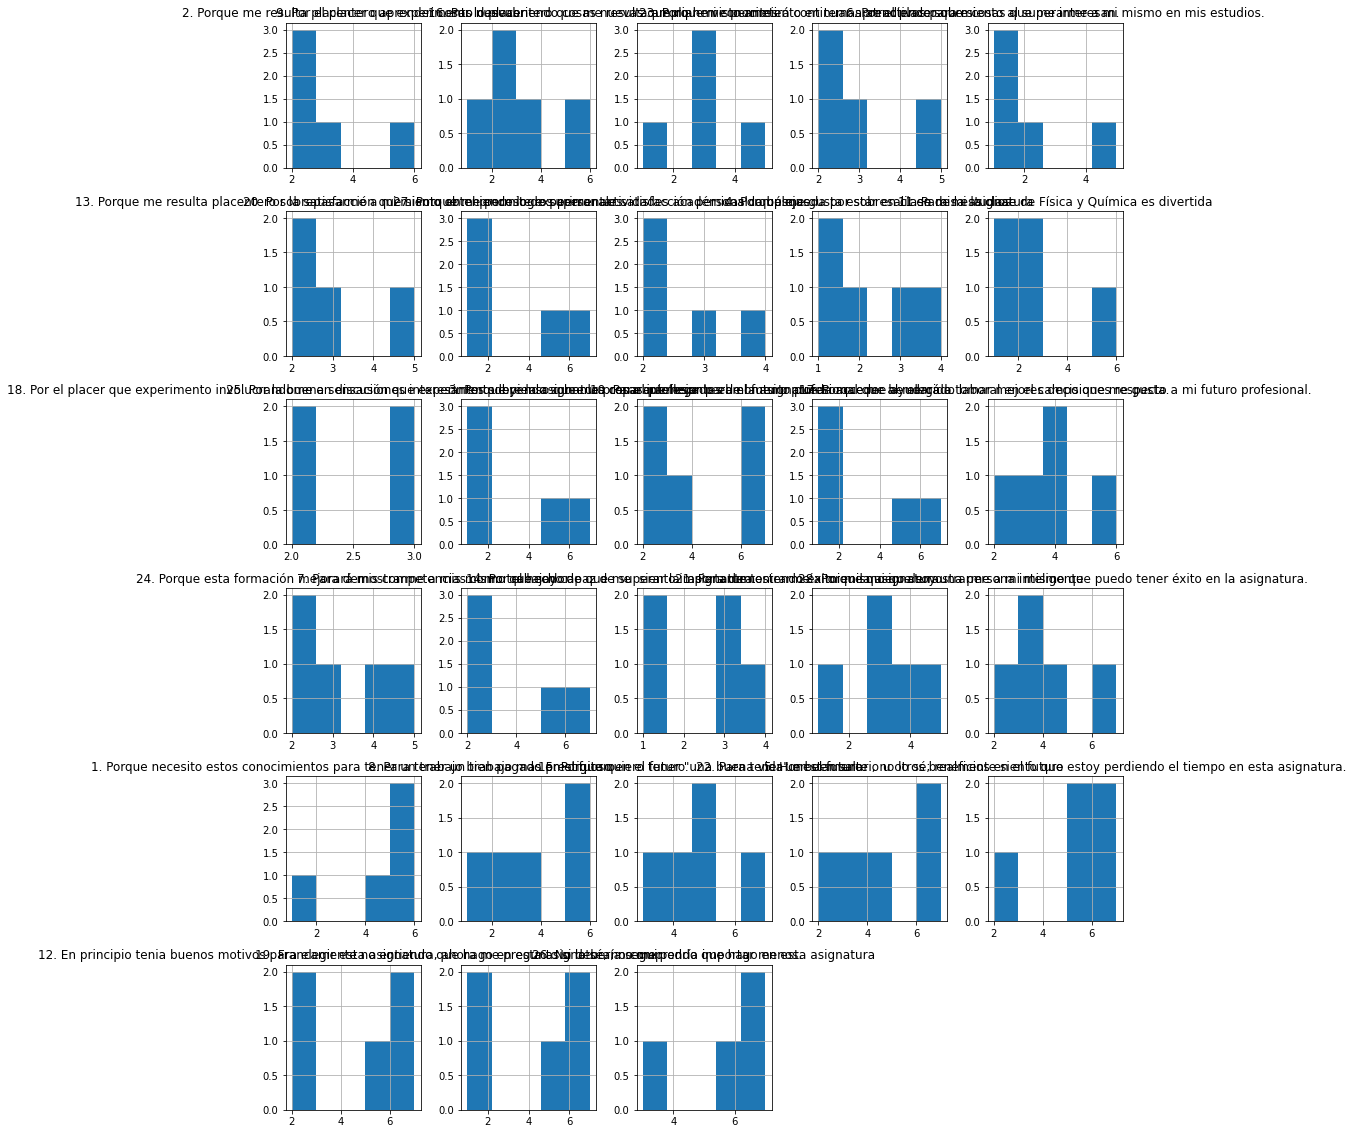

In [ ]:
df_num.hist(figsize=(15,20), bins=5, xlabelsize=10, ylabelsize=10)

#¿Que tipo de alumnos tenemos?
Clasificaremos a los alumnos en clusteres en función de su tipo de motivación usando una libreria de machine learning que nos ayudara a encontrar a los subgrupos de alumnos que se encuentrar a una distancia euclidea menor entre ellos, dentro del espacio de 28 dimensiones que son cada una de las preguntas

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#dataset=df_num.to_xarray()
X = test_df.iloc[:,3:].values
#X

Hay gente que se deja preguntas sin contestar y vamos a sustituir los faltantes por la media para no perturbar el analisis demasiado

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
(X)= imputer.transform(X)
#X

Veremos cuantos tipos de alumnos es razonable que encontremos

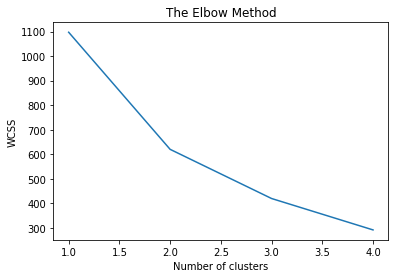

In [ ]:
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

El codo de la curva nos indica que es razonable agrupar a los alumnos en 3 tipos y procederemos a aplicar el metodo.

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

ahora agrupamos la suma de todas las preguntas conrrespondientes a Motivacion Intrinseca y Extrinseca

In [ ]:
X=np.c_[X,X[:,0:12].sum( axis=1),X[:,12:24].sum( axis=1)]
X.shape

(9, 30)

a continuación representaremos graficamente esos grupos de estudiantes

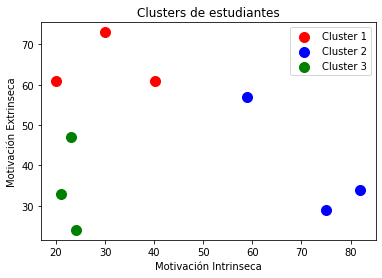

In [ ]:
plt.scatter(X[y_kmeans == 0,28], X[y_kmeans == 0, 29], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 28], X[y_kmeans == 1, 29], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 28], X[y_kmeans == 2, 29], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 28], kmeans.cluster_centers_[:, 29], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters de estudiantes')
plt.xlabel('Motivación Intrinseca')
plt.ylabel('Motivación Extrinseca')
plt.legend()
plt.show()

#Correlación entre variables
Mapa de calor, deberia aparecer correlación entre las preguntas que miden el mismo factor.

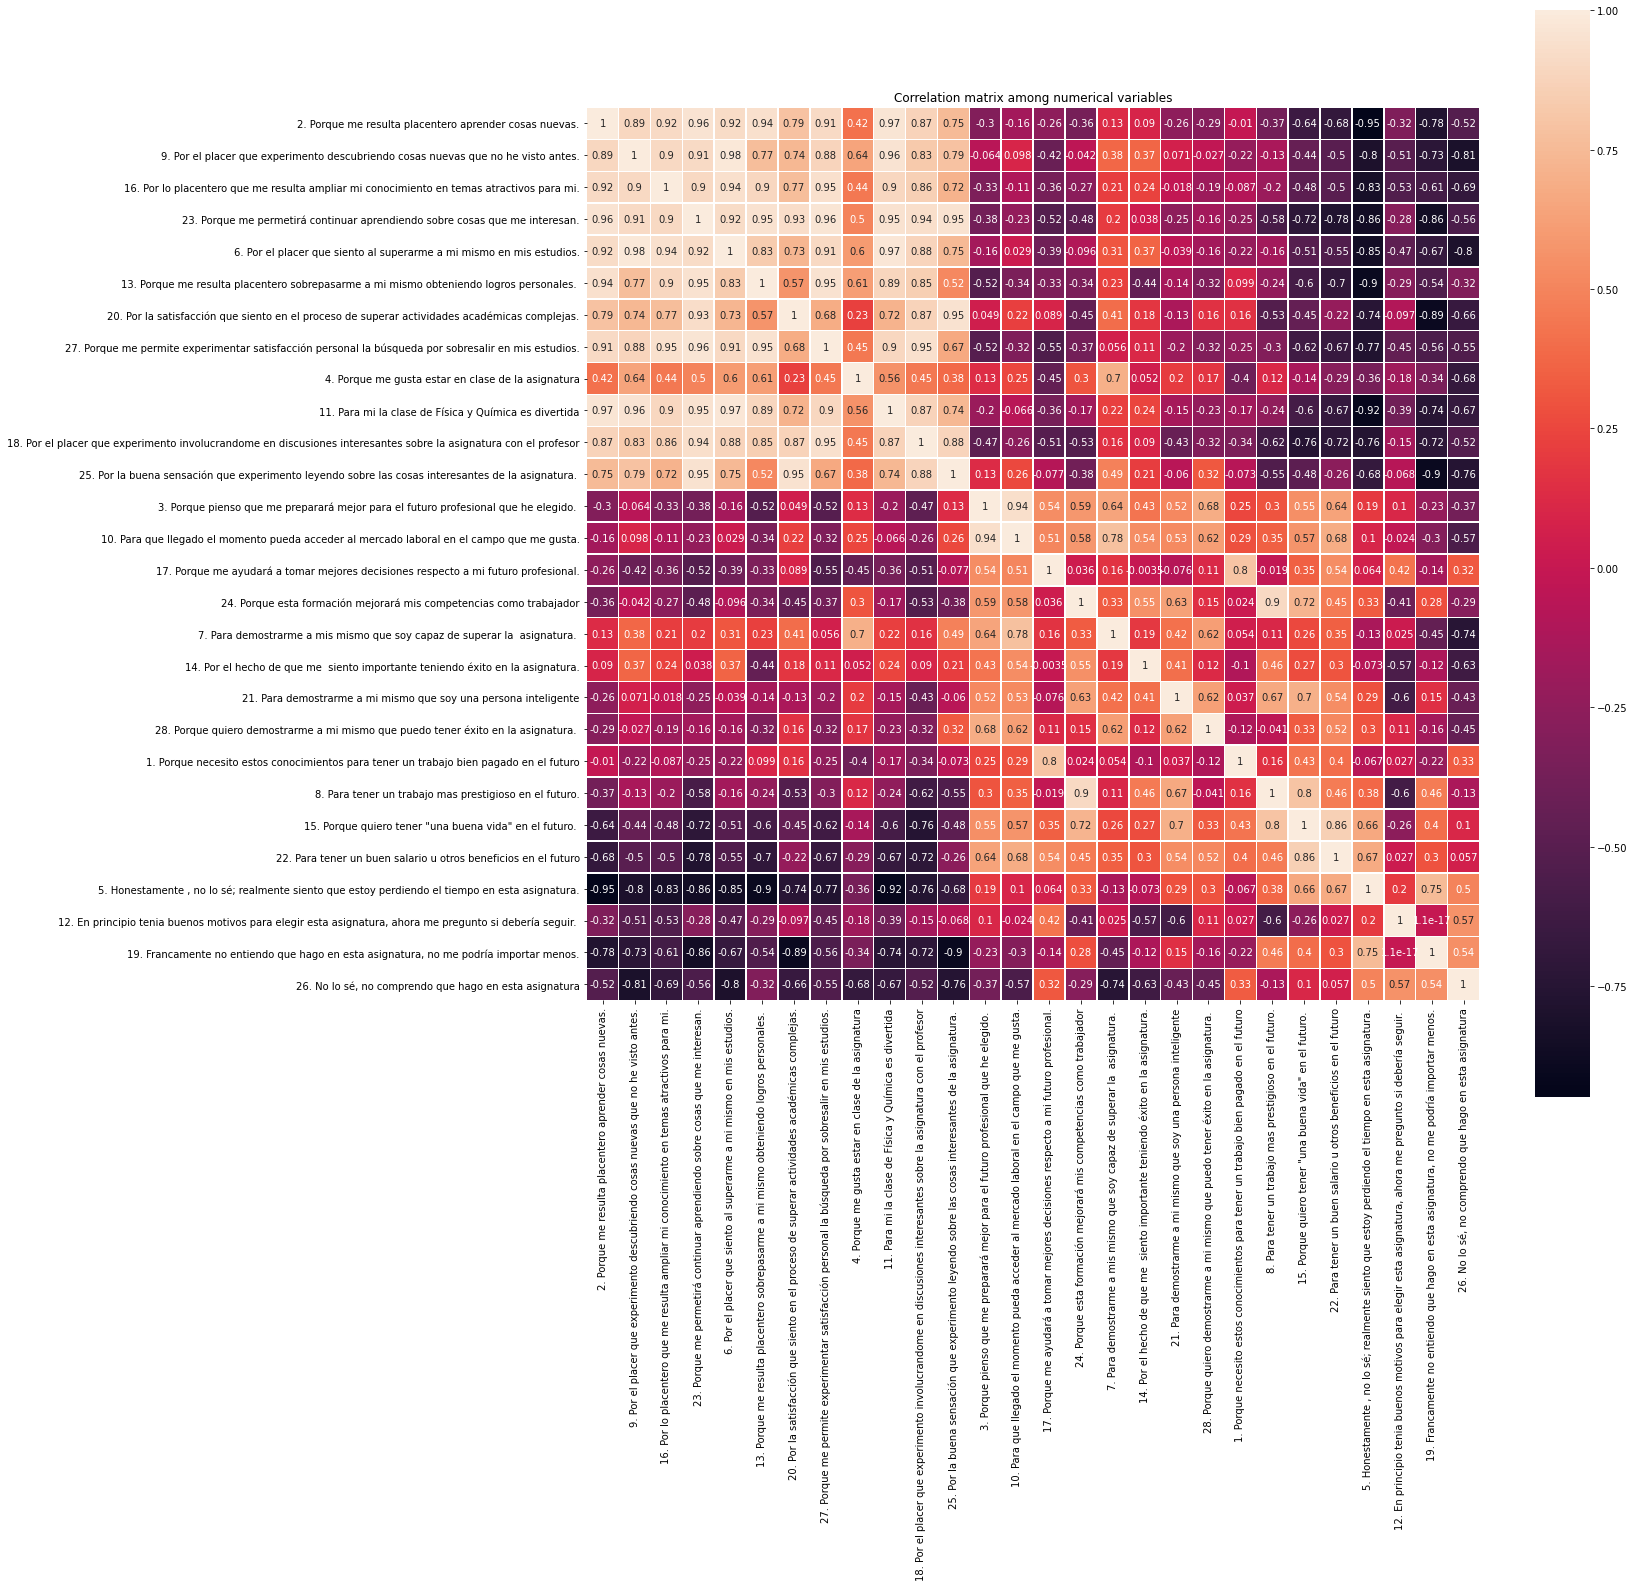

In [ ]:
#df_num.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(), square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among numerical variables")
plt.show()

Lista de las mas correlacionadas. Aqui deberiamos encontrar las preguntas que miden el mismo factor

In [ ]:
df_numerical_corr = df_num.corr().iloc[:,[27]]
df_numerical_corr

,"26. No lo sé, no comprendo que hago en esta asignatura"
2. Porque me resulta placentero aprender cosas nuevas.,-0.522482
9. Por el placer que experimento descubriendo cosas nuevas que no he visto antes.,-0.809186
16. Por lo placentero que me resulta ampliar mi conocimiento en temas atractivos para mi.,-0.685322
23. Porque me permetirá continuar aprendiendo sobre cosas que me interesan.,-0.560414
6. Por el placer que siento al superarme a mi mismo en mis estudios.,-0.799674
13. Porque me resulta placentero sobrepasarme a mi mismo obteniendo logros personales.,-0.316750
20. Por la satisfacción que siento en el proceso de superar actividades académicas complejas.,-0.662645
27. Porque me permite experimentar satisfacción personal la búsqueda por sobresalir en mis estudios.,-0.545529
4. Porque me gusta estar en clase de la asignatura,-0.679102
11. Para mi la clase de Física y Química es divertida,-0.674662


In [ ]:

df_numerical_most_corr = df_numerical_corr[abs(df_numerical_corr) > 0.8].sort_values(by='26. No lo sé, no comprendo que hago en esta asignatura', ascending='false')
df_numerical_most_corr

,"26. No lo sé, no comprendo que hago en esta asignatura"
9. Por el placer que experimento descubriendo cosas nuevas que no he visto antes.,-0.809186
"26. No lo sé, no comprendo que hago en esta asignatura",1.000000
2. Porque me resulta placentero aprender cosas nuevas.,NaN
16. Por lo placentero que me resulta ampliar mi conocimiento en temas atractivos para mi.,NaN
23. Porque me permetirá continuar aprendiendo sobre cosas que me interesan.,NaN
6. Por el placer que siento al superarme a mi mismo en mis estudios.,NaN
13. Porque me resulta placentero sobrepasarme a mi mismo obteniendo logros personales.,NaN
20. Por la satisfacción que siento en el proceso de superar actividades académicas complejas.,NaN
27. Porque me permite experimentar satisfacción personal la búsqueda por sobresalir en mis estudios.,NaN
4. Porque me gusta estar en clase de la asignatura,NaN


Relacion entre las variables

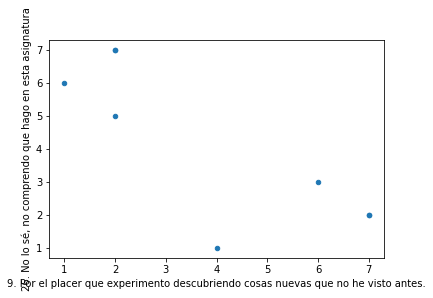

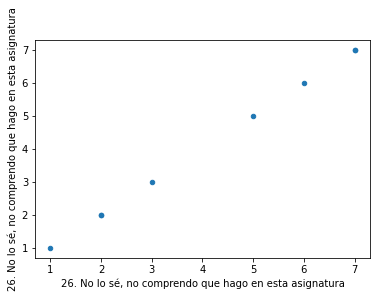

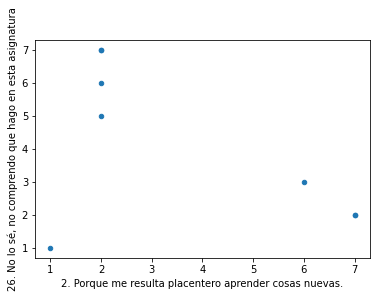

In [ ]:
for idx in df_numerical_most_corr.index[0:3]:
    test_df.plot(kind='scatter',
          x=idx,
          y='26. No lo sé, no comprendo que hago en esta asignatura')

#Posibles Mejoras
Devolver a los alumnos los resultados del analisis estadístico

In [ ]:
# Import Python Packages
import smtplib# Set Global Variables
gmail_user = 'YOUR EMAIL'
gmail_password = 'YOUR PASSWORD'# Create Email 
mail_from = gmail_user
#abria que hacer un bucle con los destinatarios sacados de la columna de la hoja de calculo donde se almacena
mail_to = 'DESTINATOR EMAIL'
mail_subject = 'Hello'
mail_message_body = 'Hello World!'

mail_message = '''\
From: %s
To: %s
Subject: %s
%s
''' % (mail_from, mail_to, mail_subject, mail_message_body)# Sent Email
server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
server.login(gmail_user, gmail_password)
server.sendmail(mail_from, mail_to, mail_message)
server.close()